# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the vgsales dataset

In [3]:
df=pd.read_csv('vgsales.csv')

In [4]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Understand the data

In [5]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# Information of the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Understand data inside the dataframe

In [7]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# Data cleaning

Handle missing values

In [8]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
med_year=int(df['Year'].median())
df['Year']=df['Year'].fillna(med_year)

In [10]:
df['Publisher'].fillna('Unknown')

0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16598, dtype: object

Convert year to int

In [11]:
df['Year']=df['Year'].astype(int)

# Data Transformation

Clean text columns

In [12]:
for col in ['Name', 'Platform', 'Genre', 'Publisher']:
    df[col] = df[col].astype(str).str.strip().str.title()

In [13]:
df.duplicated().any()
df=df.drop_duplicates()

In [14]:
df['Sales_Tier'] = pd.cut(df['Global_Sales'], bins=[0, 1, 5, 10, 100], labels=['Low', 'Mid', 'High', 'Blockbuster'])


In [15]:
df['Decade'] = (df['Year'] // 10) * 10

In [16]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Tier,Decade
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Blockbuster,2000
1,2,Super Mario Bros.,Nes,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Blockbuster,1980
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Blockbuster,2000
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Blockbuster,2000
4,5,Pokemon Red/Pokemon Blue,Gb,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Blockbuster,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker In Crazy Castle 5,Gba,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Low,2000
16594,16597,Men In Black Ii: Alien Escape,Gc,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Low,2000
16595,16598,Score International Baja 1000: The Official Game,Ps2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Low,2000
16596,16599,Know How 2,Ds,2010,Puzzle,7G//Ames,0.00,0.01,0.00,0.00,0.01,Low,2010


In [17]:
df.reset_index(drop=True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Tier,Decade
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Blockbuster,2000
1,2,Super Mario Bros.,Nes,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Blockbuster,1980
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Blockbuster,2000
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Blockbuster,2000
4,5,Pokemon Red/Pokemon Blue,Gb,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Blockbuster,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker In Crazy Castle 5,Gba,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Low,2000
16594,16597,Men In Black Ii: Alien Escape,Gc,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Low,2000
16595,16598,Score International Baja 1000: The Official Game,Ps2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Low,2000
16596,16599,Know How 2,Ds,2010,Puzzle,7G//Ames,0.00,0.01,0.00,0.00,0.01,Low,2010


# Analysis

1. Which game has the highest global sales of all time?

In [18]:
df.loc[df['Global_Sales'].idxmax(), ['Name', 'Global_Sales']]

Name            Wii Sports
Global_Sales         82.74
Name: 0, dtype: object

2. Average global sales per game across all publishers

In [19]:
df['Global_Sales'].mean()

np.float64(0.5374406555006628)

3. Which platform has the highest total global sales?

In [20]:
df.groupby('Platform')['Global_Sales'].sum().idxmax()

'Ps2'

4. Most successful genre globally in terms of total sales

In [21]:
df.groupby('Genre')['Global_Sales'].sum().idxmax()

'Action'

5. Publisher with the most games released and how many

In [22]:
df['Publisher'].value_counts().max()

np.int64(1351)

6. Publisher with highest average global sales per game

In [23]:
df.groupby('Publisher')['Global_Sales'].mean().idxmax()

'Palcom'

7. Which region contributes most to global sales

In [24]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().idxmax()

'NA_Sales'

8. Publishers dominating only in Japan but not globally

In [25]:
japan=df.groupby('Publisher')['JP_Sales'].mean()
global_avg=df.groupby('Publisher')['Global_Sales'].mean()
top10=set(japan.sort_values(ascending=False).head(10).index)
top10_global = set(global_avg.sort_values(ascending=False).head(10).index)
top10 - top10_global

{'Aruze Corp',
 'Ascii Entertainment',
 'Compile',
 'Enix Corporation',
 'Level 5',
 'Mixi, Inc',
 'Quest',
 'Square',
 'Squaresoft'}

9. Average sales per game in each region

In [26]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

NA_Sales       0.264667
EU_Sales       0.146652
JP_Sales       0.077782
Other_Sales    0.048063
dtype: float64

10. Most common genre on each platform

In [27]:
plt_count=df.groupby(['Platform', 'Genre'])['Global_Sales'].size().reset_index(name='Count')
plt_count.loc[plt_count.groupby('Platform')['Count'].idxmax()]

,Platform,Genre,Count
0,2600,Action,61
10,3Do,Adventure,1
13,3Ds,Action,182
27,Dc,Fighting,12
37,Ds,Misc,393
52,Gb,Role-Playing,21
57,Gba,Action,167
79,Gc,Sports,110
85,Gen,Platform,7
91,Gg,Platform,1


11. Platform with highest number of game releases

In [28]:
df['Platform'].value_counts().idxmax()

'Ds'

12. Year with highest number of game releases

In [29]:
df['Year'].value_counts().idxmax()

np.int64(2007)

13. Average global sales per game changed over decades

In [30]:
df.groupby('Decade')['Global_Sales'].mean()

Decade
1980    1.836976
1990    0.722956
2000    0.500485
2010    0.490000
2020    0.290000
Name: Global_Sales, dtype: float64

14. Decade with highest total video game sales

In [31]:
df.groupby('Decade')['Global_Sales'].sum().idxmax()

np.int64(2000)

15. Percentage of games sold less than 1 million copies globally

In [32]:
(df['Global_Sales']<1).mean()*100

np.float64(87.4623448608266)

# Plot Analysis

1. Top 10 sales by global sales

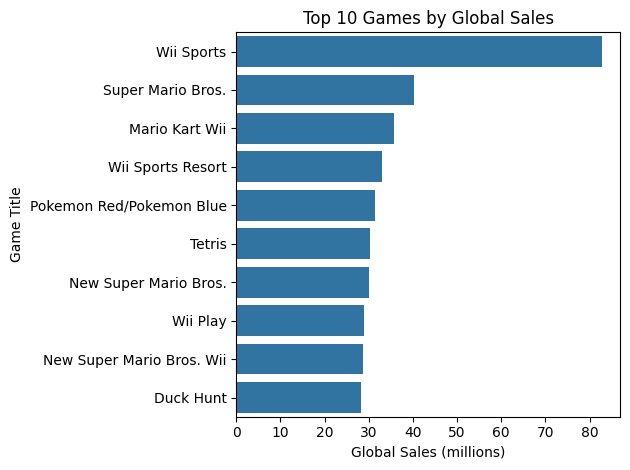

In [33]:
topgames=df.sort_values('Global_Sales', ascending=False).head(10)
sns.barplot(data=topgames, x='Global_Sales', y='Name')
plt.title('Top 10 Games by Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()

# Observation

* Wii Sports is the best-selling game with over 80 million copies sold
* Super Mario is the second highest sold game comparing to other games

2. Total Sales by Genre

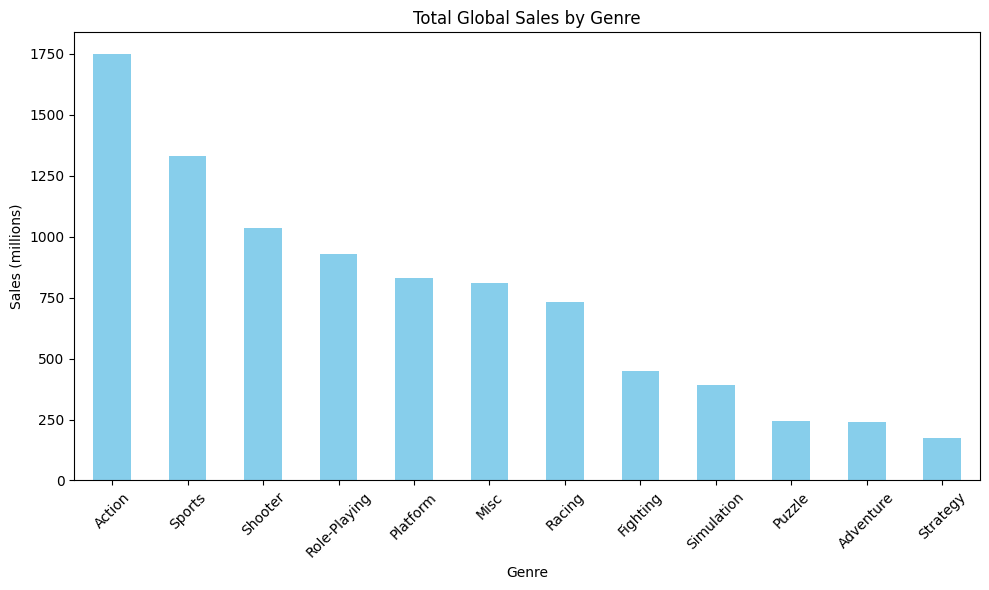

In [34]:
genresales=df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genresales.plot(kind='bar', figsize=(10,6),color='skyblue')
plt.title('Total Global Sales by Genre')
plt.ylabel('Sales (millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Observation

* Action games have the highest global sales comparing to other genres
* Sports and Shooter games are the second and third most popular genres by sales
* Strategy and Adventure games have the lowest total global sales among all genres

3. Regional Sales Distribution

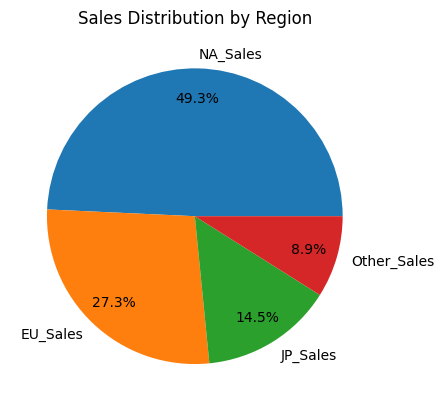

In [35]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df[regions].sum().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
plt.title('Sales Distribution by Region')
plt.show()

# Observation

* North America (NA) has the highest sale shares it is near to half of global sales
* Europe (EU) is the second highest sales shares in global market
* Other region has the lowest sale shares in global market

4. Platform Popularity by Game Count

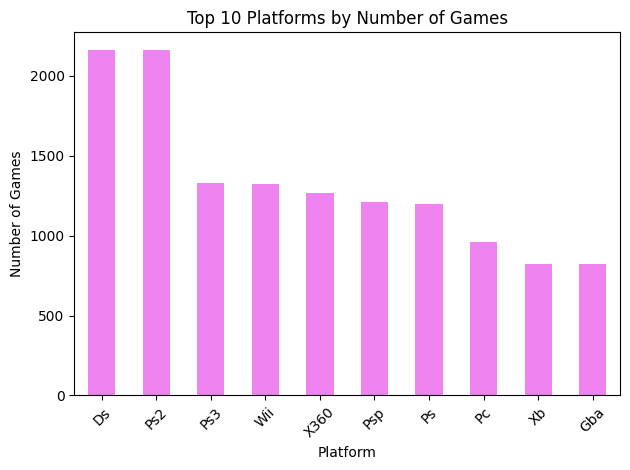

In [36]:
plt_cnt= df['Platform'].value_counts().head(10)
plt_cnt.plot(kind='bar',color='violet')
plt.title('Top 10 Platforms by Number of Games')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Observation

* DS and PS2 have the highest number of games both are having more than 2000 counts
* Ps3, Wii, and X360 are second highest number of games
* Xb and Gba are the lowest number of games

5. Sales Trend Over the Years

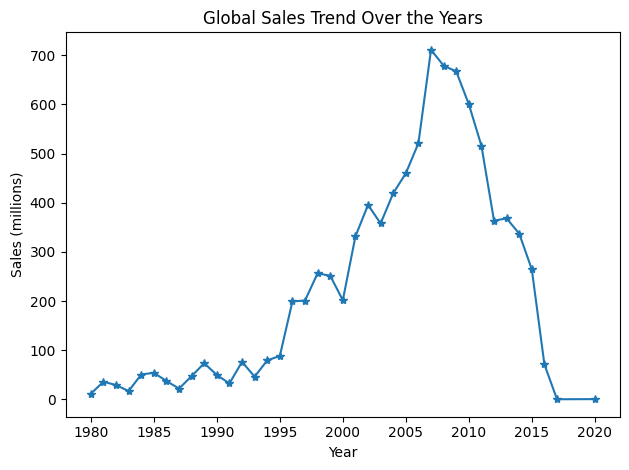

In [40]:
sales_by_years = df.groupby('Year')['Global_Sales'].sum()
sales_by_years.plot(kind='line',marker='*')
plt.title('Global Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
# plt.grid(True)
plt.tight_layout()
plt.show()

# Observation

* Sales increased from the early 1980 to the mid-2000
* The sales was peaked at 2006 it is near to 700 million
* After 2015 sales was decreased

6. Finding correlation for numerical columns

<Axes: >

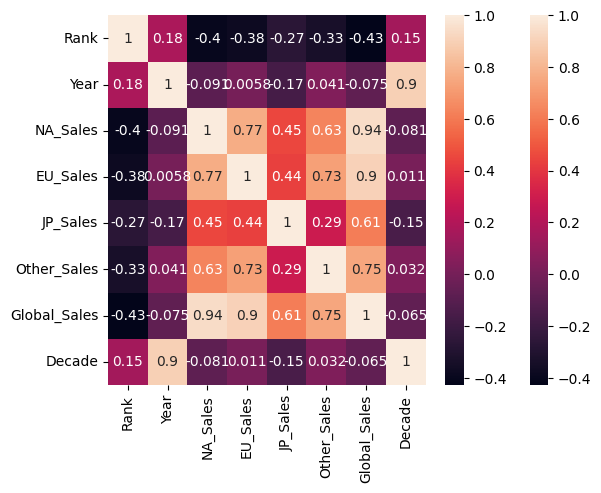

In [ ]:
relation=df.corr(numeric_only=True)
sns.heatmap(data=relation)
sns.heatmap(relation,annot=True)

# Observation

* Global Sales has a strong correlation with North America, Europe, and Other region sales
* Rank has a negative correlated with sales
* Year is strongly correlated with Decade

7. Top 10 Publishers by Total Sales

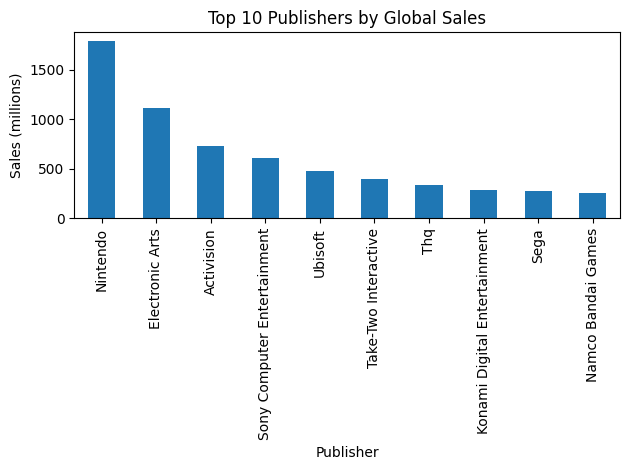

In [ ]:
pub_sales= df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
pub_sales.plot(kind='bar')
plt.title('Top 10 Publishers by Global Sales')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Observation

* Nintendo is the top publisher with the highest global sales
* Electronic Arts and Activision are the second and third highest selling publishers
* Namco Bandai Games are the lowest selling publisher

8. Number of Games Released each Year

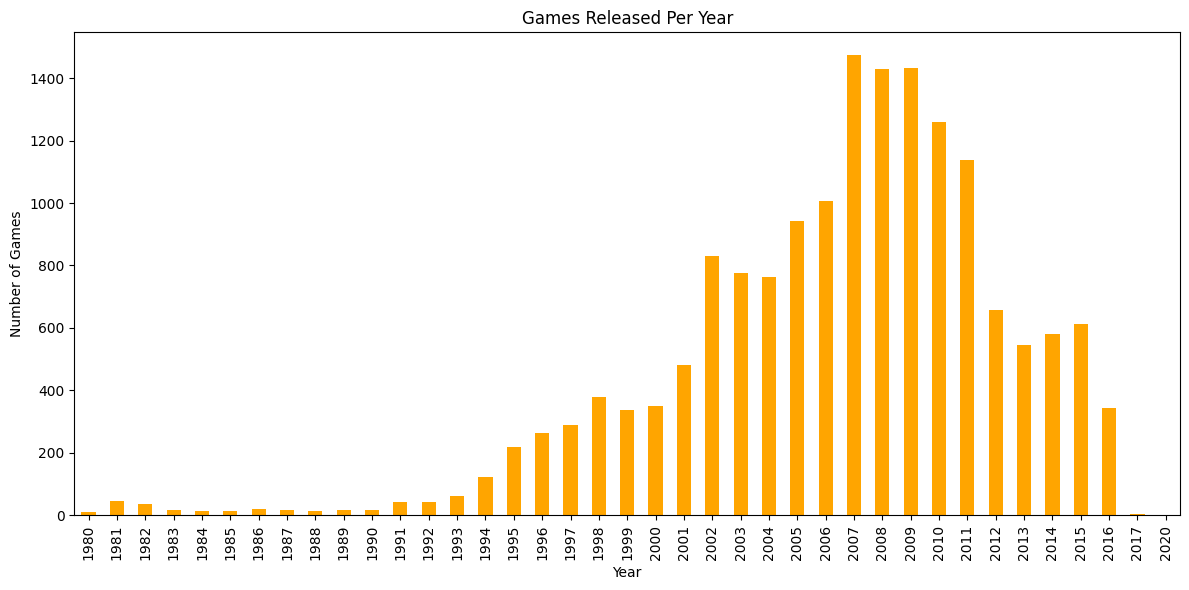

In [ ]:
games_per_year = df['Year'].value_counts().sort_index()
games_per_year.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

# Observation

* Game releases increased from 1990 to around 2008
* 2008 had the highest number of game releases
* After 2010 the number of games released was decreased

9. Compare Regional Sales for Top Games

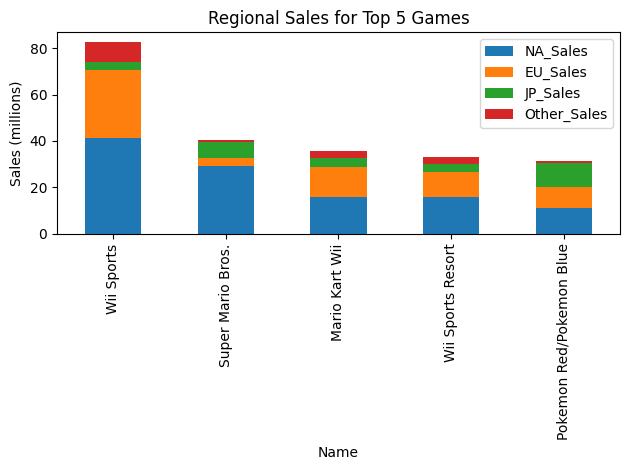

In [ ]:
top_games = df.sort_values('Global_Sales', ascending=False).head(5)
top_games.set_index('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot(kind='bar', stacked=True)
plt.title('Regional Sales for Top 5 Games')
plt.ylabel('Sales (millions)')
plt.tight_layout()
plt.show()

# Observation

* Wii Sports is the top-selling game in North America and Europe
* Pokemon Red/Blue has higher sales in Japan compared to the other games

10. Distribution of Global Sales

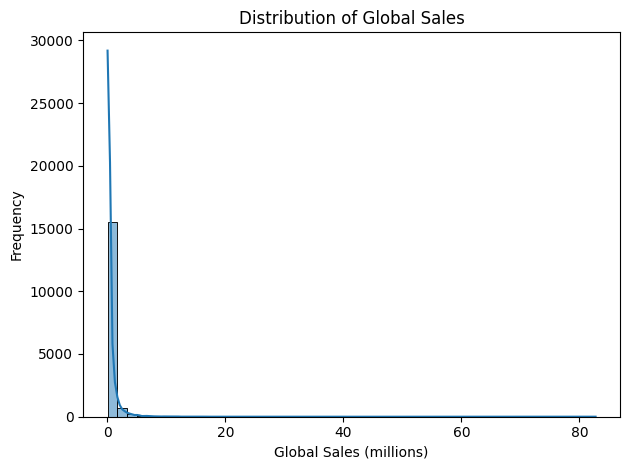

In [ ]:
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Observation

* Most games has a lowest global sales
* Few games are sold most but most games are sold less

11. Finding Correlation for Sales

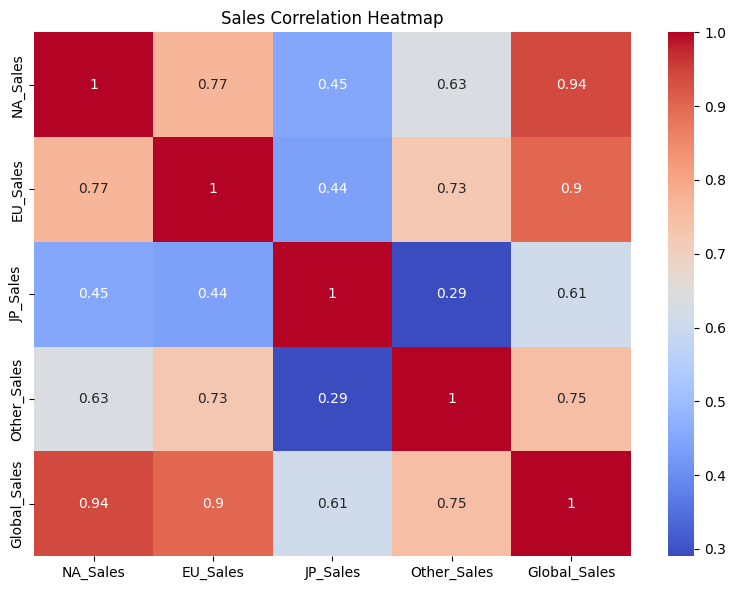

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Sales Correlation Heatmap')
plt.tight_layout()
plt.show()

# Observation

12. Most Common Genre Per Platform

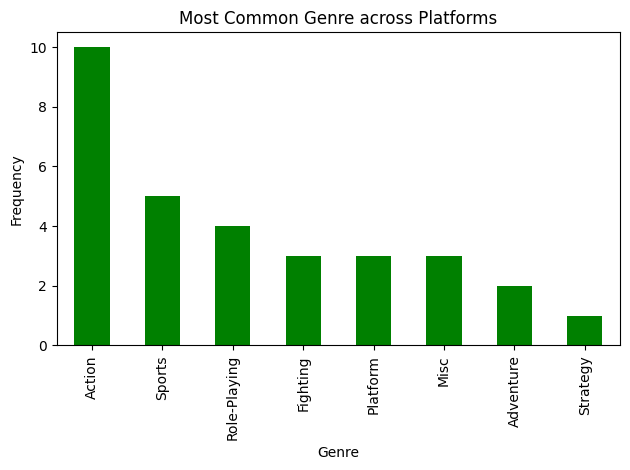

In [ ]:
platform_genre_mode = df.groupby('Platform')['Genre'].agg(lambda x: x.mode()[0])
platform_genre_mode.value_counts().plot(kind='bar', color='Green')
plt.title('Most Common Genre across Platforms')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Observation

* Action is the most common genre comparing to other genres
* Sport is the second highest common genre
* Strategy is the lowest genre in all platform

13. Average Global Sales by Decade

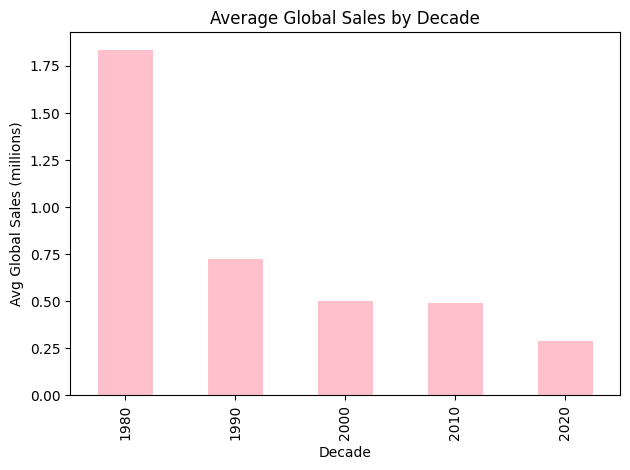

In [ ]:
df['Decade'] = (df['Year'] // 10) * 10
df.groupby('Decade')['Global_Sales'].mean().plot(kind='bar', color='Pink')
plt.title('Average Global Sales by Decade')
plt.ylabel('Avg Global Sales (millions)')
plt.tight_layout()
plt.show()

# Observation

* 1980 has the highest global sales comparing to other decades
* In 2020 the sale was decreased

14. Top Genre in Each Region

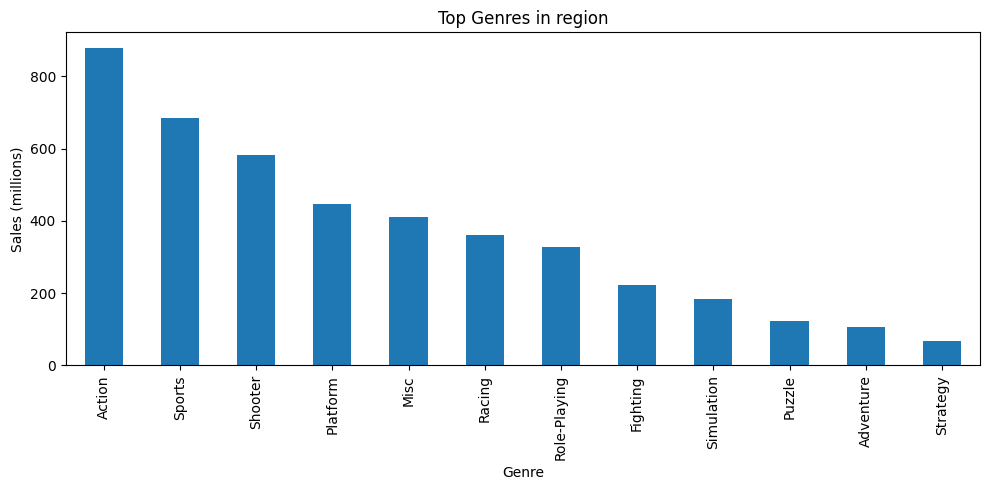

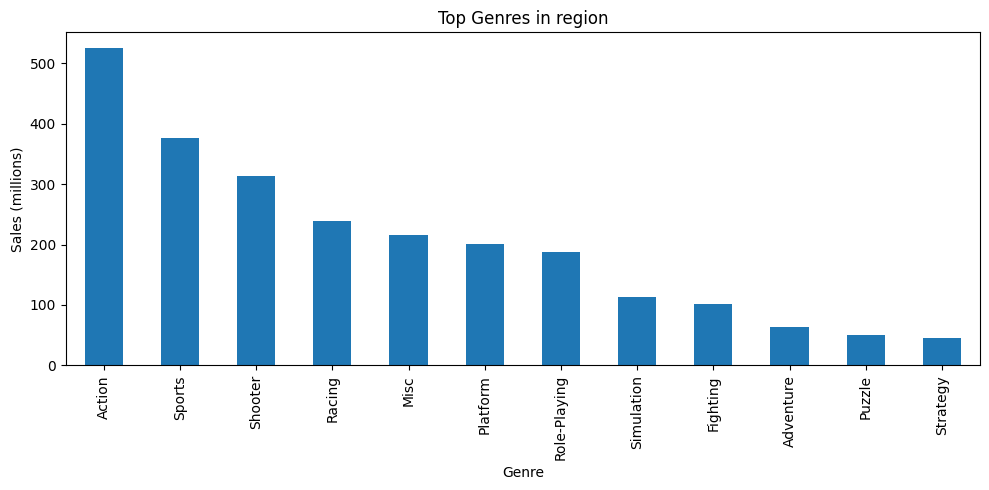

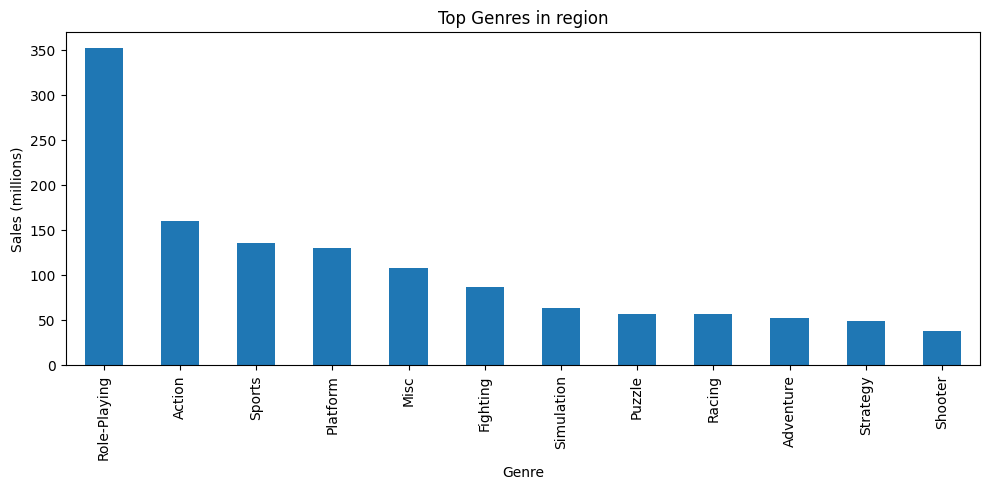

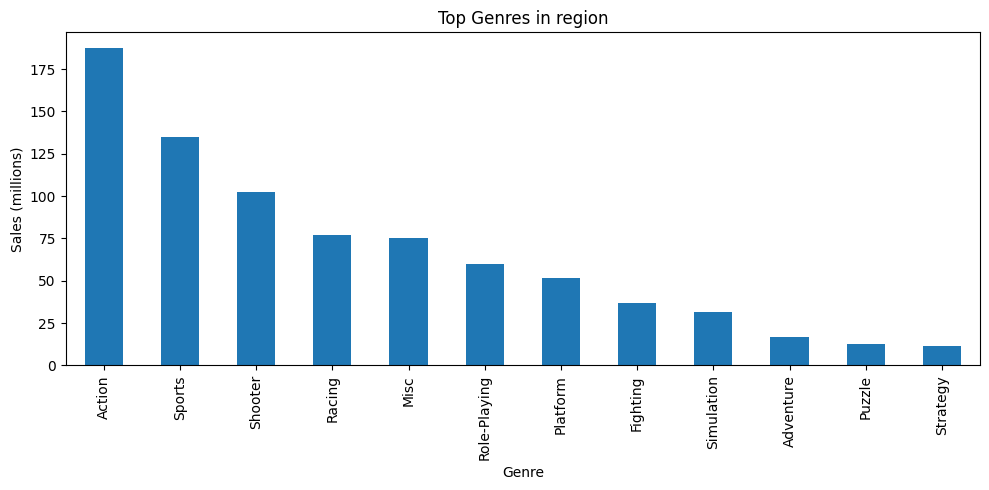

In [ ]:
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    df.groupby('Genre')[region].sum().sort_values(ascending=False).plot(kind='bar', title='Top Genres in region', figsize=(10, 5))
    plt.ylabel('Sales (millions)')
    plt.tight_layout()
    plt.show()

# Observation

* In all region Action and Sports are the highest sale genres
* Strategy is the lowsest sale genre in all regions

15. Global sales by Genre using Boxplot

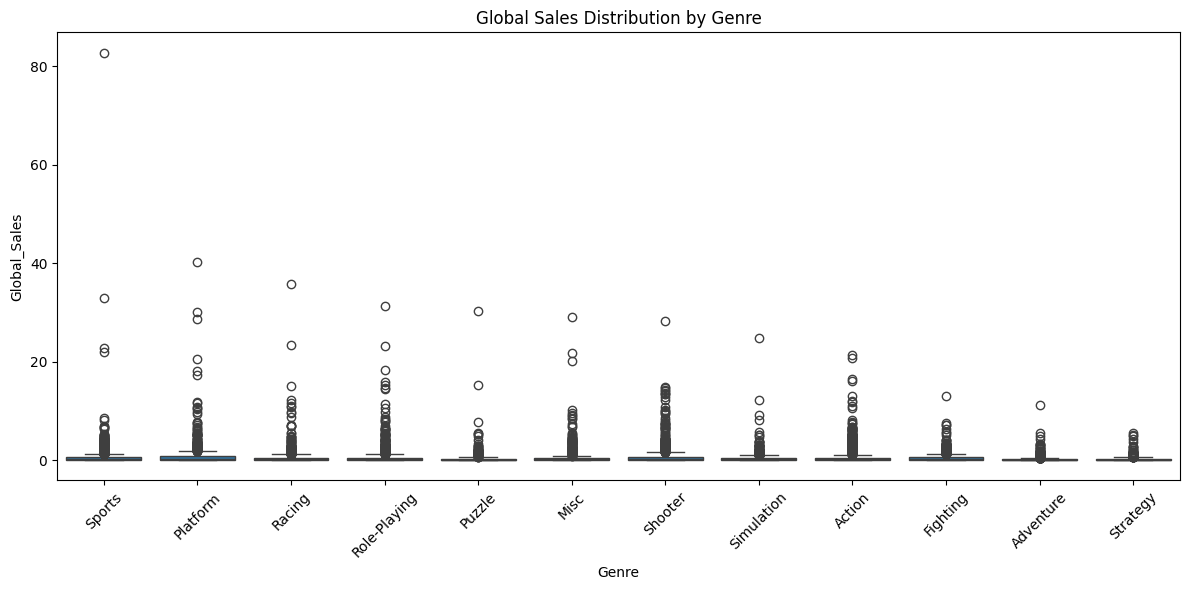

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre', y='Global_Sales')
plt.xticks(rotation=45)
plt.title('Global Sales Distribution by Genre')
plt.tight_layout()
plt.show()

# Observation

* Sports and Shooter genres show they are outliers
* Few blockbuster games are increases the genres average

# Conclusion

* Action and Sports are the most successful genres
* North America and Europe is the largest market for video games
* PlayStation 2 had the highest number of game releases among all platforms
* Sales peaked between 2006–2009
* Nintendo leads in total sales among publishers
* Sales are droped at 2020